<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/Clasificacion_Imagenes_Futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##IMPORTAMOS LAS LIBRERIAS NECESARIAS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten, Dense, Reshape,Conv2D,MaxPooling2D,Conv2DTranspose
from tensorflow.keras.models import Sequential
import os

## Cargando los datos
- Acá cada imagen tiene un tamaño de 28x28, lo que significa una entrada de 784

In [2]:
##CONECTAMOS CON GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DESCOMPRIMIMOS LAS CARPETAS QUE CONTIENEN LOS ARCHIVOS. EN ESTE CASO TENEMOS UN FOLDER POR CATEGORIA
!unzip '/content/drive/MyDrive/1. TrabajoDeepLearning/CristianoRonaldo.zip'

In [ ]:
!unzip '/content/drive/MyDrive/1. TrabajoDeepLearning/LionelMessi.zip'

In [ ]:
##Do not run this! THIS WILL DELETE THE UNZIPED FOLDER 
import shutil
shutil.rmtree("/content/imagenesFutbol")

In [5]:
##Creamos variables con el path de los folders
import os
path_messi = '/content/LionelMessi'
path_cr7 = '/content/CristianoRonaldo'

In [6]:
#ESTO NOS PERMITE GENERAR UN LABEL A LOS ARCHIVOS DENTRO DE CADA CARPETA
x = 0
for i in os.listdir(path_messi):
  file_oldname = os.path.join(path_messi, i)
  file_newname_newfile = os.path.join(path_messi, f'messi_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x = x + 1

In [7]:
x = 0
for i in os.listdir(path_cr7):
  file_oldname = os.path.join(path_cr7, i)
  file_newname_newfile = os.path.join(path_cr7, f'cr7_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x += 1

In [8]:
##CREAMOS listas USANDO LA FUNCIÓN glob con los path names de los archivos
import glob
cr7= glob.glob("/content/CristianoRonaldo/*.jpg")
the_goat= glob.glob("/content/LionelMessi/*.jpg")

In [ ]:
cr7

In [10]:
len(cr7)

2419

In [11]:
len(the_goat)

2307

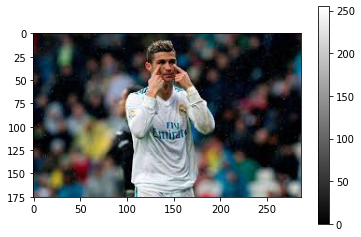

In [12]:
img = plt.imread(cr7[0])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [13]:
img.shape

(176, 287, 3)

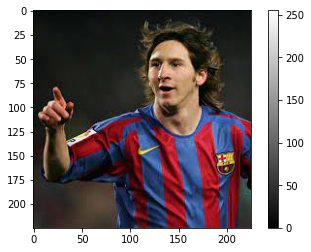

In [14]:
img = plt.imread(the_goat[1525])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [15]:
img.shape

(225, 225, 3)

##creamos una lista con la ruta de las imagenes para cargar los datos de entrenamiento. Luego lo convertimos en un array

In [17]:
import random
train = (the_goat+ cr7)
##random.shuffle(train)

In [18]:
fnames_train = np.array(train)

In [19]:
fnames_train

array(['/content/LionelMessi/messi_562.jpg',
       '/content/LionelMessi/messi_2029.jpg',
       '/content/LionelMessi/messi_768.jpg', ...,
       '/content/CristianoRonaldo/cr7_523.jpg',
       '/content/CristianoRonaldo/cr7_1180.jpg',
       '/content/CristianoRonaldo/cr7_1692.jpg'], dtype='<U38')

In [20]:
labels_train = np.array([(0 if 'messi' in fname else 1) for fname in fnames_train])

In [21]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([2307, 2419]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cristianos y Messias')

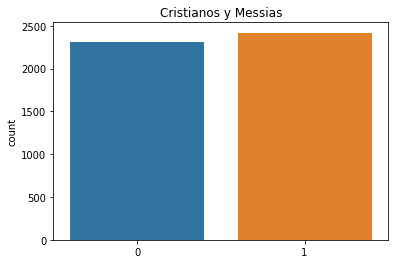

In [22]:
import seaborn as sns
sns.countplot(labels_train)
plt.title('Cristianos y Messias')

In [23]:
#Esta función lee una imagen, y la devuelve convertida al tamaño que requerimos (64x64). Que es el shape que definimos en la red neuronal de arriba (input_shape)
def read_image(file_path, ROWS = 28,COLS = 28):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

In [24]:
#Ahora, esta función convierte todas las imagenes, utilizando la función anterior. Entonces esta función hace un ciclo, leyendo cada imagen y convirtiendola
def prep_data(images, ROWS = 28,COLS = 28,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [25]:
import cv2
ROWS = 128
COLS = 128
CHANNELS = 3
train = prep_data(fnames_train,ROWS=ROWS,COLS=COLS)

In [26]:
train.shape

(4726, 128, 128, 3)

In [29]:
# Normalizar los datos
x_train = train.astype('float32')/255.

In [30]:
from tensorflow.keras.models import Sequential

In [43]:
classifier = Sequential()
classifier.add(Conv2D(100, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(50, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(25, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [44]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train,labels_train, test_size=0.3, random_state=7)

In [46]:
history=classifier.fit(X_train,Y_train, epochs = 5,validation_data=(X_val,Y_val))

Epoch 1/5
104/104 [==============================] - 5s 44ms/step - loss: 0.5742 - accuracy: 0.7059 - val_loss: 0.4616 - val_accuracy: 0.7891
Epoch 2/5
104/104 [==============================] - 4s 40ms/step - loss: 0.4221 - accuracy: 0.8089 - val_loss: 0.4006 - val_accuracy: 0.8350
Epoch 3/5
104/104 [==============================] - 4s 41ms/step - loss: 0.3665 - accuracy: 0.8316 - val_loss: 0.3615 - val_accuracy: 0.8427
Epoch 4/5
104/104 [==============================] - 4s 41ms/step - loss: 0.3250 - accuracy: 0.8555 - val_loss: 0.3639 - val_accuracy: 0.8533
Epoch 5/5
104/104 [==============================] - 4s 41ms/step - loss: 0.2885 - accuracy: 0.8712 - val_loss: 0.3488 - val_accuracy: 0.8470


In [47]:
classifier.evaluate(X_val,Y_val)

45/45 [==============================] - 1s 16ms/step - loss: 0.3488 - accuracy: 0.8470


[0.3487556576728821, 0.8469675779342651]

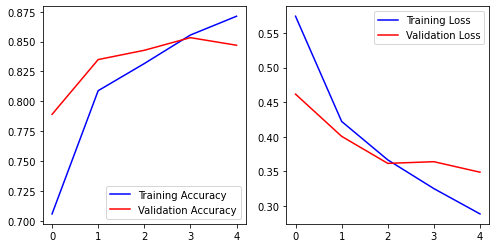

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [49]:
predictions = classifier.predict(X_val)

In [50]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'cr7 65% (cr7)')

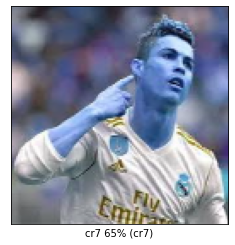

In [51]:
index_image=20
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(X_val[index_image])

predicted_label = "messi" if predictions[index_image]<0.5 else "cr7"
real_label="messi" if Y_val[index_image]==0 else "cr7"
plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                              100*np.max(predictions[index_image]),
                              real_label))

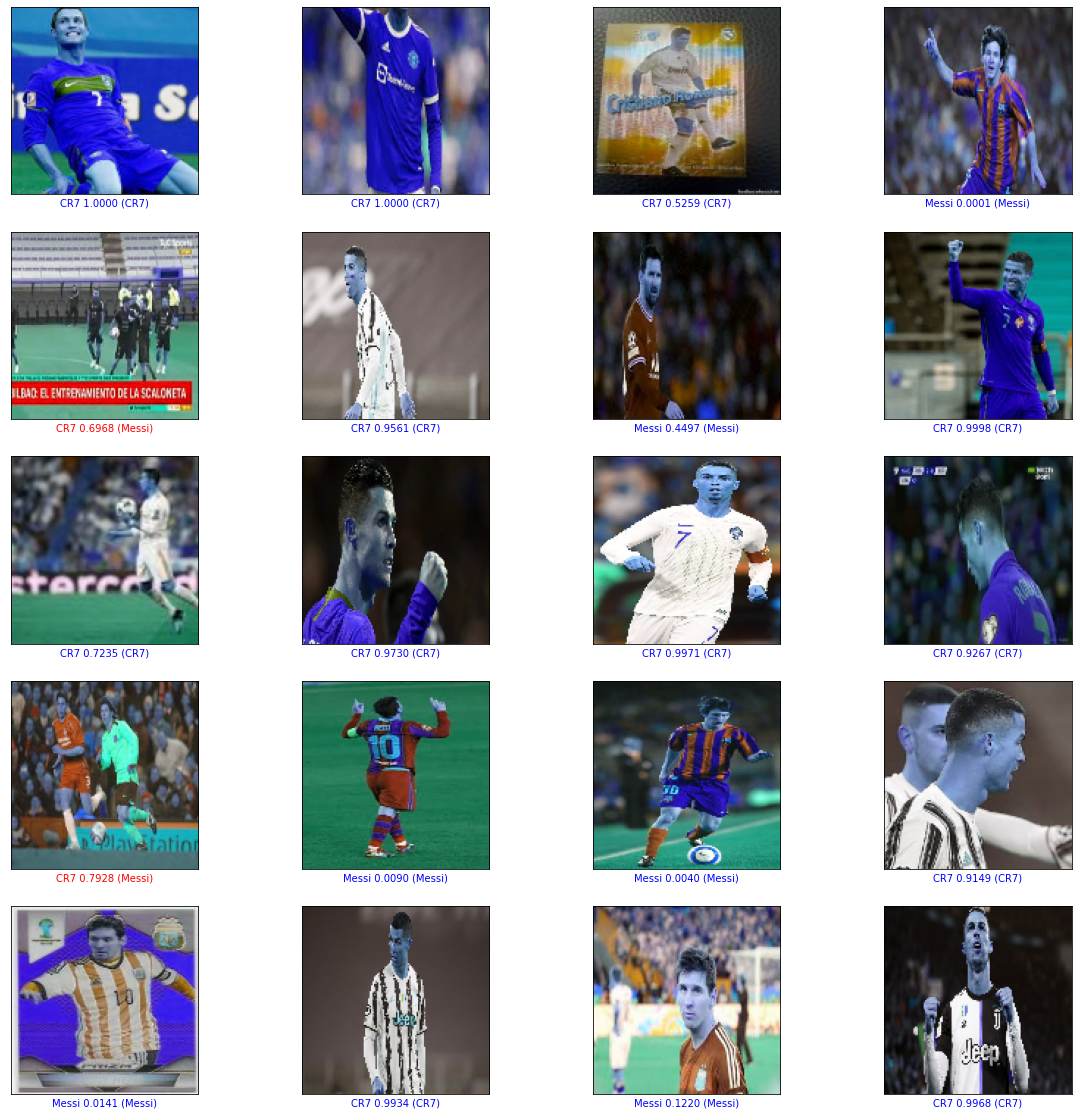

In [52]:
plt.figure(figsize=(20,20))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_val[index_image])
  predicted_label = "Messi" if predictions[index_image]<0.5 else "CR7"
  real_label="Messi" if Y_val[index_image]==0 else "CR7"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image]):.4f} ({real_label})', color=color)

In [53]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val, predictions_label)

In [55]:
classes = np.unique(Y_val)
classes

array([0, 1])

In [56]:
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
print(accuracy, misclass)

0.8469675599435825 0.15303244005641747


In [57]:
cm

array([[519, 148],
       [ 69, 682]])

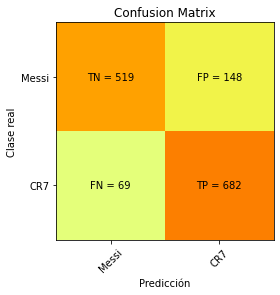

In [58]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Messi','CR7']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

## Transferencia de aprendizaje (usando otras redes entrenadas)

In [62]:
import glob

In [60]:
!unzip "/content/drive/MyDrive/1. TrabajoDeepLearning/ImagenesFutbol.zip"

Archive:  /content/drive/MyDrive/1. TrabajoDeepLearning/ImagenesFutbol.zip
  inflating: test.rar                
  inflating: train.zip               


In [ ]:
!unzip "/content/test.zip"
!unzip "/content/train.zip"

In [ ]:
glob.glob('/content/train/*.jpg')

In [64]:
fnames_train = np.array(glob.glob('/content/train/*.jpg'))
labels_train = np.array([(0 if 'LeoMessi' in fname else 1) for fname in fnames_train])

In [65]:
fnames_train

array(['/content/train/LeoMessi_1402.jpg', '/content/train/CR7_1660.jpg',
       '/content/train/CR7_1584.jpg', ..., '/content/train/CR7_1046.jpg',
       '/content/train/LeoMessi_1778.jpg', '/content/train/CR7_1666.jpg'],
      dtype='<U32')

In [66]:
labels_train

array([0, 1, 1, ..., 1, 0, 1])

In [69]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([1848, 1935]))

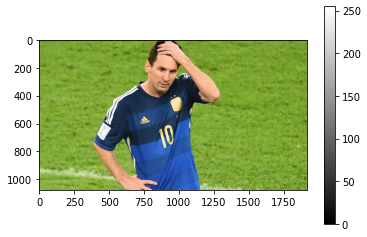

In [68]:
img = plt.imread(fnames_train[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [71]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
dataset_home = '/content/ImagenesFutbol/'

labeldirs = ['CR7s/', 'Messies/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)

src_directory = '/content/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('LeoMessi'):
		dst = dataset_home + 'Messies/'  + file
		copyfile(src, dst)
	elif file.startswith('CR7'):
		dst = dataset_home + 'CR7s/'  + file
		copyfile(src, dst)

In [73]:
dataset_home = '/content/data_CR7vs_Messi/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['CR7s/', 'Messies/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

seed(1)

val_ratio = 0.2
src_directory = '/content/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('LeoMessi'):
		dst = dataset_home + dst_dir + 'Messies/'  + file
		copyfile(src, dst)
	elif file.startswith('CR7'):
		dst = dataset_home + dst_dir + 'CR7s/'  + file
		copyfile(src, dst)

In [74]:
batch_size=32
train_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/train', class_mode='binary', batch_size=batch_size, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/test', class_mode='binary', batch_size=batch_size, target_size=(224, 224),shuffle=False)

Found 3028 images belonging to 2 classes.
Found 755 images belonging to 2 classes.


## Transferencia de aprendizaje (usando otras redes entrenadas)

##RESNET50

In [75]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [76]:
base_modelResNet50=ResNet50(pooling='max', weights='imagenet')

102981632/102967424 [==============================] - 3s 0us/step


In [ ]:
tf.keras.utils.plot_model(base_modelResNet50, show_shapes=True)

In [ ]:
base_modelResNet50.summary()

In [79]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [80]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [81]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [82]:
epochs=10
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=epochs, verbose=1)

Epoch 1/10
95/95 [==============================] - 45s 432ms/step - loss: 1.0333 - accuracy: 0.5644 - val_loss: 0.9426 - val_accuracy: 0.5139
Epoch 2/10
95/95 [==============================] - 36s 378ms/step - loss: 0.7445 - accuracy: 0.5958 - val_loss: 0.6756 - val_accuracy: 0.6132
Epoch 3/10
95/95 [==============================] - 37s 388ms/step - loss: 0.6197 - accuracy: 0.6526 - val_loss: 0.6026 - val_accuracy: 0.6742
Epoch 4/10
95/95 [==============================] - 36s 381ms/step - loss: 0.6448 - accuracy: 0.6655 - val_loss: 0.6116 - val_accuracy: 0.6609
Epoch 5/10
95/95 [==============================] - 36s 380ms/step - loss: 0.6131 - accuracy: 0.6628 - val_loss: 0.6444 - val_accuracy: 0.6358
Epoch 6/10
95/95 [==============================] - 36s 378ms/step - loss: 0.5741 - accuracy: 0.6912 - val_loss: 0.6692 - val_accuracy: 0.6172
Epoch 7/10
95/95 [==============================] - 36s 381ms/step - loss: 0.5564 - accuracy: 0.7018 - val_loss: 0.6134 - val_accuracy: 0.6901

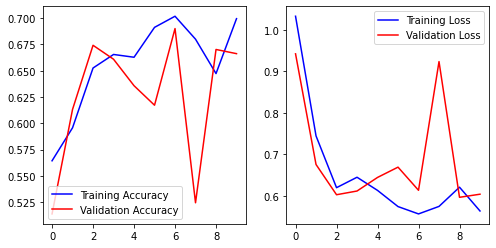

In [83]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

##VGG16

In [84]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
model.summary()

In [86]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
##La capa dense recibe vectores, por eso debe tener una capa flatten anterior
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [87]:
epochs=10
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=5, verbose=1)

Epoch 1/5
95/95 [==============================] - 47s 458ms/step - loss: 0.5822 - accuracy: 0.6886 - val_loss: 0.5089 - val_accuracy: 0.7483
Epoch 2/5
95/95 [==============================] - 39s 407ms/step - loss: 0.4605 - accuracy: 0.7843 - val_loss: 0.4181 - val_accuracy: 0.7987
Epoch 3/5
95/95 [==============================] - 39s 412ms/step - loss: 0.3361 - accuracy: 0.8613 - val_loss: 0.4313 - val_accuracy: 0.8119
Epoch 4/5
95/95 [==============================] - 39s 408ms/step - loss: 0.2860 - accuracy: 0.8880 - val_loss: 0.3414 - val_accuracy: 0.8596
Epoch 5/5
95/95 [==============================] - 39s 410ms/step - loss: 0.2376 - accuracy: 0.9122 - val_loss: 0.3578 - val_accuracy: 0.8517


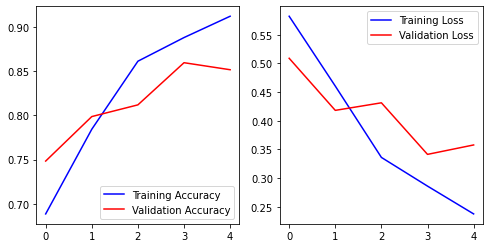

In [88]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [89]:
Y_pred = model.predict(test_it)

In [90]:
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]

In [91]:
labels_test=test_it.labels

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm

array([[355,  29],
       [ 83, 288]])

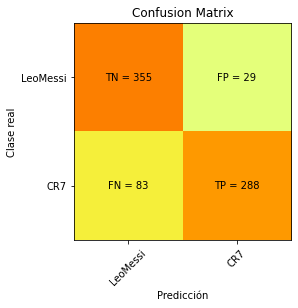

In [93]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['LeoMessi','CR7']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

In [94]:
classes=list(train_it.class_indices.keys())

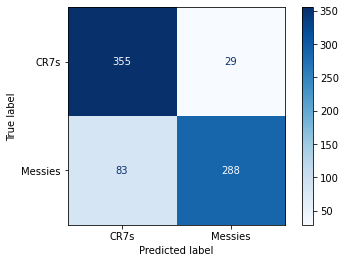

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

##VGG19

In [114]:
batch_size=32
train_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/train', class_mode='binary', batch_size=batch_size, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/test', class_mode='binary', batch_size=batch_size, target_size=(224, 224),shuffle=False)

Found 3028 images belonging to 2 classes.
Found 755 images belonging to 2 classes.


In [115]:
from tensorflow.keras.applications.vgg19 import VGG19

In [116]:
model = VGG19(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=10, verbose=1)

Epoch 1/10
95/95 [==============================] - 40s 418ms/step - loss: 0.6387 - accuracy: 0.6219 - val_loss: 0.5011 - val_accuracy: 0.7828
Epoch 2/10
95/95 [==============================] - 39s 410ms/step - loss: 0.5045 - accuracy: 0.7493 - val_loss: 0.4492 - val_accuracy: 0.7854
Epoch 3/10
95/95 [==============================] - 39s 411ms/step - loss: 0.3843 - accuracy: 0.8339 - val_loss: 0.3767 - val_accuracy: 0.8318
Epoch 4/10
95/95 [==============================] - 39s 412ms/step - loss: 0.3434 - accuracy: 0.8550 - val_loss: 0.3732 - val_accuracy: 0.8199
Epoch 5/10
95/95 [==============================] - 39s 410ms/step - loss: 0.3096 - accuracy: 0.8735 - val_loss: 0.3940 - val_accuracy: 0.8132
Epoch 6/10
95/95 [==============================] - 39s 412ms/step - loss: 0.2779 - accuracy: 0.8871 - val_loss: 0.5248 - val_accuracy: 0.7497
Epoch 7/10
95/95 [==============================] - 39s 413ms/step - loss: 0.3048 - accuracy: 0.8778 - val_loss: 0.5171 - val_accuracy: 0.7642

In [118]:
Y_pred = model.predict(test_it)

In [119]:
model.evaluate(test_it)

24/24 [==============================] - 8s 321ms/step - loss: 0.3871 - accuracy: 0.8411


[0.38706174492836, 0.8410596251487732]

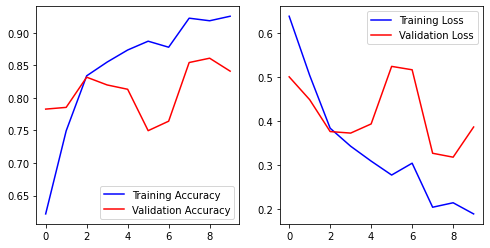

In [120]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

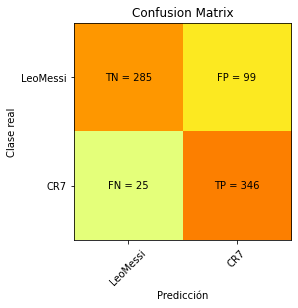

In [103]:
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_it.labels, predictions_label)
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['LeoMessi','CR7']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

##INCEPTION V3

In [104]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
modelInceptionV3=InceptionV3()
modelInceptionV3.summary()

In [107]:
batch_size=16
train_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/train', class_mode='binary', batch_size=batch_size, target_size=(299, 299))
test_it = datagen.flow_from_directory('/content/data_CR7vs_Messi/test', class_mode='binary', batch_size=batch_size, target_size=(299, 299),shuffle=False)

Found 3028 images belonging to 2 classes.
Found 755 images belonging to 2 classes.


In [108]:
model = InceptionV3(include_top=False, input_shape=(299, 299, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

87924736/87910968 [==============================] - 2s 0us/step


In [109]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=10, verbose=1)

Epoch 1/10
190/190 [==============================] - 49s 227ms/step - loss: 4.9805 - accuracy: 0.6962 - val_loss: 1.0219 - val_accuracy: 0.8331
Epoch 2/10
190/190 [==============================] - 42s 224ms/step - loss: 1.3228 - accuracy: 0.8369 - val_loss: 0.6607 - val_accuracy: 0.8715
Epoch 3/10
190/190 [==============================] - 40s 210ms/step - loss: 0.5136 - accuracy: 0.9016 - val_loss: 0.5572 - val_accuracy: 0.8742
Epoch 4/10
190/190 [==============================] - 40s 210ms/step - loss: 0.3525 - accuracy: 0.9194 - val_loss: 1.1042 - val_accuracy: 0.7907
Epoch 5/10
190/190 [==============================] - 39s 208ms/step - loss: 0.1648 - accuracy: 0.9640 - val_loss: 0.6774 - val_accuracy: 0.8742
Epoch 6/10
190/190 [==============================] - 39s 206ms/step - loss: 0.1425 - accuracy: 0.9617 - val_loss: 0.6174 - val_accuracy: 0.8768
Epoch 7/10
190/190 [==============================] - 39s 208ms/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 0.7591 - val_ac

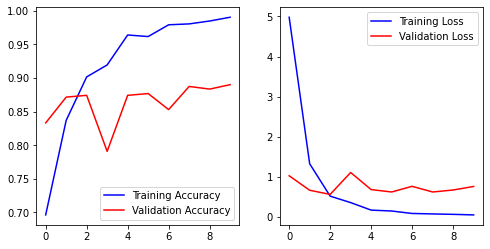

In [110]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

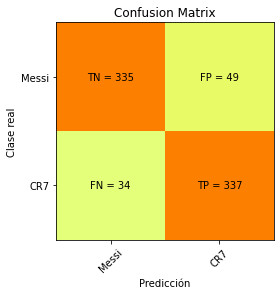

In [111]:
Y_pred = model.predict(test_it)
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_it.labels, predictions_label)
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Messi','CR7']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()